# Analysis of the Hotel Booking

### The goal of this project is to predict if a guest will actually come or he will cancel the resrvation,
### it will be usefull for hotels if they have model like this to offer more rooms or take a retainer from the client before the resrvation.
### I choseI chose the classification Model for this project

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data
 I used hotels dataset from contains 119,390 waterpoints with 32 features for each
"Hotel booking demand"
From the paper: hotel booking demand datasets"
 https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [24]:
Data = pd.read_csv(r'C:\Users\mmm--\Desktop\T5\hotel_bookings.csv')
Data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [25]:
Data.shape

(119390, 32)

#### making sure all columns are unique

In [26]:
len(Data.columns.unique())

32

In [27]:
Data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### There are 4 columns have empty values

In [28]:
Data.columns[Data.isna().any()].unique()

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [29]:
print ("Number of columns have empty values :")
len(Data.columns[Data.isna().any()].unique())

Number of columns have empty values :


4

#### i'm gonna look more deeper into these four columns

In [30]:
print("Number of empty values in children column: ", Data['children'].isnull().sum())
print("Percentage： ", Data['children'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in children column:  4
Percentage：  0.003350364352123293


In [31]:
print("Number of empty values in country column: ", Data['country'].isnull().sum())
print("Percentage： ", Data['country'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in country column:  488
Percentage：  0.40874445095904177


In [32]:
print("Number of empty values in agent column: ", Data['agent'].isnull().sum())
print("Percentage： ", Data['agent'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in agent column:  16340
Percentage：  13.686238378423655


In [33]:
print("Number of empty values in company column: ", Data['company'].isnull().sum())
print("Percentage： ", Data['company'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in company column:  112593
Percentage：  94.30689337465449


#### company column show that is 94% of columns are missing so i can't use it any more i'll drop it

In [34]:
Data = Data.drop(['company'], axis =1)

#### Making sure the company column was deleted

In [35]:
Data.shape

(119390, 31)

### What pepoles prefer to book resort hotel or city hotel ( give me a precentage ) ?
#### as we see most of the pepole (%66) prefer to book a city hotel bcause the resort usually more expensive 

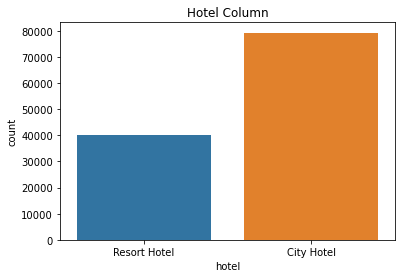

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

In [36]:
plt.title("Hotel Column")
sns.countplot(x=Data['hotel'])
plt.show()
Data['hotel'].value_counts() / Data.shape[0] * 100

### What is the perecntage of pepole who's cancel there reservation ?
#### as we see here %62 of pepoles not canceled their reservations

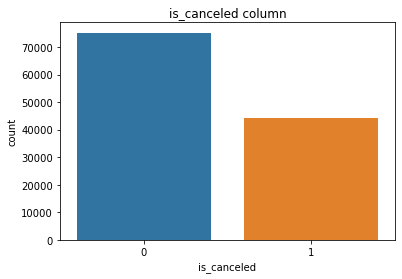

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

In [37]:
plt.title("is_canceled column")
sns.countplot(x=Data['is_canceled'])
plt.show()
Data['is_canceled'].value_counts() / Data.shape[0] * 100

### which are the most busy month ?
#### it shows the must pepoles booked in August

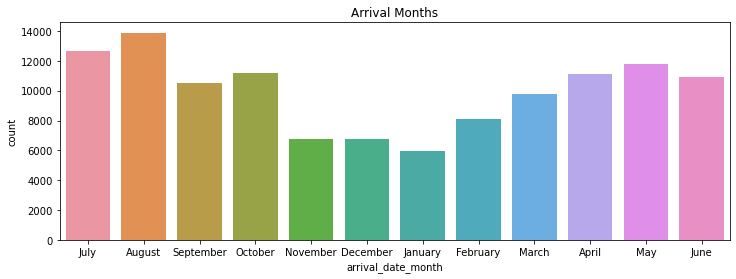

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [38]:
plt.figure(figsize=(12, 4))
plt.title("Arrival Months")
sns.countplot(x=Data['arrival_date_month'])
plt.show()
Data['arrival_date_month'].value_counts()

## now after we know this information we see a problem with higher cancelation , so we want to predict the cancelation from creating a model to figure how to solve the problem

#### now i'll split the columns into numrical & catigorical, and chose the train sets

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","assigned_room_type", "deposit_type","customer_type"]

features = num_features + cat_features
X = Data.drop(["is_canceled"], axis=1)[features]
y = Data["is_canceled"]

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

### now we will test several Models and we will chose the best performance of them
#### As we see the best performance model is RandomForestClassifier with %87 accuracy

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1))]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.8266 +/- 0.0013 (std) min: 0.8247, max: 0.8279
RF_model cross validation accuarcy score: 0.8696 +/- 0.0011 (std) min: 0.8678, max: 0.8703
LR_model cross validation accuarcy score: 0.7977 +/- 0.0016 (std) min: 0.7961, max: 0.8003


#### we see that earlier customer books the hotel, the more likly it's to be canceled

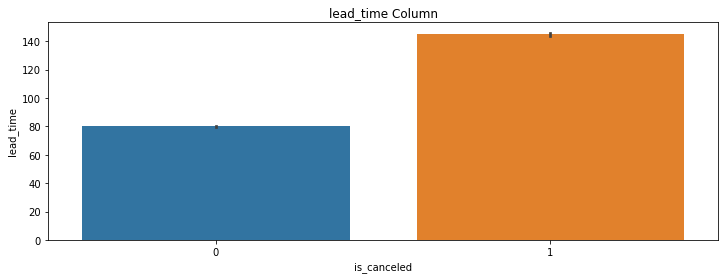

   is_canceled   lead_time
0            0   79.984687
1            1  144.848815


In [43]:
plt.figure(figsize=(12, 4))
plt.title("lead_time Column")
sns.barplot(x=Data['is_canceled'], y=Data['lead_time'])
plt.show()

print( Data[["lead_time","is_canceled"]].groupby(["is_canceled"], as_index = False).mean() )

#### we see here that more special requests the costumer makes, that less likely he will cancel the reservation

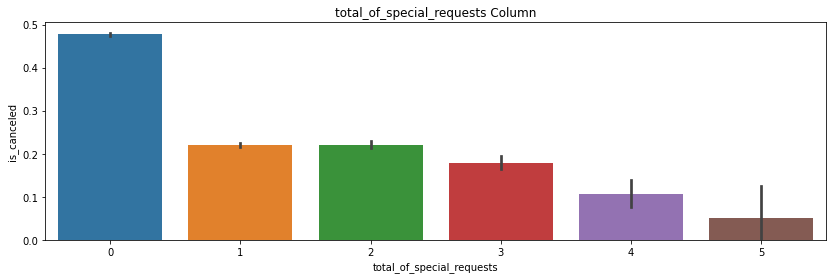

   total_of_special_requests  is_canceled
0                          0     0.477204
1                          1     0.220249
2                          2     0.220989
3                          3     0.178614
4                          4     0.105882
5                          5     0.050000


In [45]:
plt.figure(figsize=(14, 4))
plt.title("total_of_special_requests Column")
sns.barplot(x=Data['total_of_special_requests'], y=Data['is_canceled'])
plt.show()

print( Data[["total_of_special_requests","is_canceled"]].groupby(["total_of_special_requests"], as_index = False).mean() )